In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # 1. Load and Clean Sales Data

In [3]:
# Load data
data = pd.read_csv('sales.csv')

df = pd.DataFrame(data)
# Show last few rows
df.tail()

,OrderID,OrderDate,Region,Salesperson,ProductName,Sales
5,1006,2023-03-17,West,Frank,Monitor,470
6,1007,2023-04-01,North,Grace,Tablet,820
7,1008,2023-04-16,South,Heidi,Printer,750
8,1009,2023-05-01,East,Ivan,Laptop,1100
9,1010,2023-05-16,West,Judy,Monitor,490


In [4]:
# Check for missing values
print(df.isnull().sum())

OrderID        0
OrderDate      0
Region         0
Salesperson    0
ProductName    0
Sales          0
dtype: int64


In [6]:
# Drop or fill missing values (example: drop rows with nulls)
df = df.dropna()

#  2. Explore Data: Top Products, Monthly Trends, Regional Sales

In [8]:
#  Top Selling Products

top_products = df.groupby('ProductName')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

ProductName
Laptop     3600
Tablet     1620
Printer    1450
Monitor    1410
Name: Sales, dtype: int64


In [11]:
#  Monthly Sales Trends

# Convert 'Date' column to datetime if it's not already
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract month
df['Month'] = df['OrderDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)

Month
2023-01    2450
2023-02     700
2023-03    1770
2023-04    1570
2023-05    1590
Freq: M, Name: Sales, dtype: int64


In [12]:
# Regional Sales

regional_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(regional_sales)

Region
East     3600
West     1760
South    1450
North    1270
Name: Sales, dtype: int64


# 3. Create Visualizations

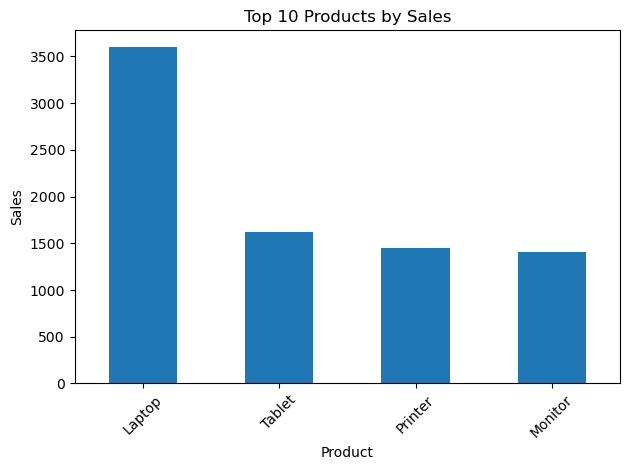

In [13]:
# Bar Plot - Top Products

top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

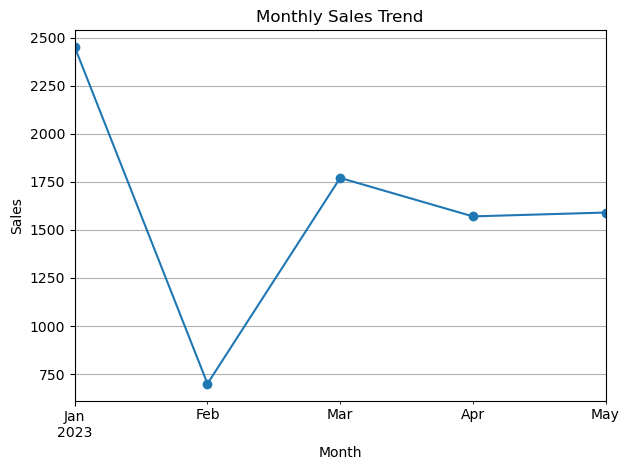

In [14]:
# Line Chart - Monthly Sales

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

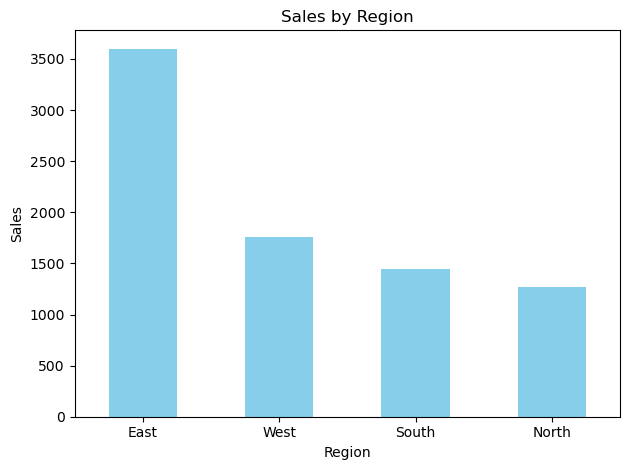

In [15]:
# Bar Plot - Regional Sales

regional_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Extract Insights